In [1]:
import os, sys
import re
import h5py
import corner
import numpy as np
import pandas as pd
import vallog as vl
import matplotlib.pyplot as plt


In [2]:
sys.path.append("../Util")
from create_test_yaml import create_yaml

msg = vl.Logger()

In [3]:
input_file: str = input("path/to/hdf5/file: ")
if input_file == "":
    input_file = "../data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File {input_file} does not exist.")
if "hdf5" not in input_file:
    raise ValueError(f"File {input_file} is not a hdf5 file.")

msg.log(f"Inspecting file {input_file}", vl.info)

[Info]                  Inspecting file
                        /home/vallereichi/mssmscanning/data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5


In [4]:
hdf5 = h5py.File(input_file, "r")['MSSM']
hdf5_df = pd.DataFrame({key: hdf5[key][:] for key in hdf5.keys()})
input_parameters = []
pattern = re.compile(r'#MSSM.*atQ_parameters @MSSM.*atQ::primary_parameters::(?!.*_isvalid).*$')
for key in hdf5.keys():
    print(key)
    match = pattern.search(key)
    if match:
        input_parameters.append(match.group())

labels = [string.split('::')[-1] for string in input_parameters]
parameter_df = hdf5_df[input_parameters]
parameter_df.columns = labels
parameter_df = parameter_df.loc[:, parameter_df.nunique() > 2]


mask = hdf5_df["LogLike_isvalid"] == 1
valid_models = parameter_df[mask]



msg.log(f"number of generated models: {hdf5_df.shape[0]}", vl.info)
msg.log(f"number of valid models: {valid_models.shape[0]}", vl.info)
valid_models


#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2_isvalid
#MSSM7atQ_parameters

,Ad_3,Au_3,M2,TanBeta,mHd2,mHu2,mf2
1,882.022712,-1995.277558,72.414989,5.038812,1.300186e+06,-6.244740e+05,4.989901e+05
17,-7127.352025,-37.569889,379.887319,4.232436,2.101901e+05,-2.938751e+06,1.285361e+06
21,-146.071356,669.625148,1157.596272,29.378495,4.004564e+05,-6.008040e+05,4.986486e+06
28,134.297158,-3641.381937,261.207873,25.064270,2.300585e+06,-2.340940e+06,4.624700e+06
32,60.760028,-2016.203491,8.537305,45.330060,8.195634e+05,-2.096018e+06,6.300457e+06
...,...,...,...,...,...,...,...
973,-86.047863,112.800711,-490.062892,8.824284,2.726240e+06,-1.729198e+06,1.520513e+05
982,-1066.052196,-0.620660,-604.067962,23.317014,2.895674e+06,-5.863929e+05,1.748777e+06
990,4981.913992,253.740906,77.098761,10.876718,1.625236e+06,-1.624318e+06,3.209267e+05
994,5006.544625,-3360.380051,-0.402901,38.008965,2.879174e+06,-5.782416e+05,1.356176e+06


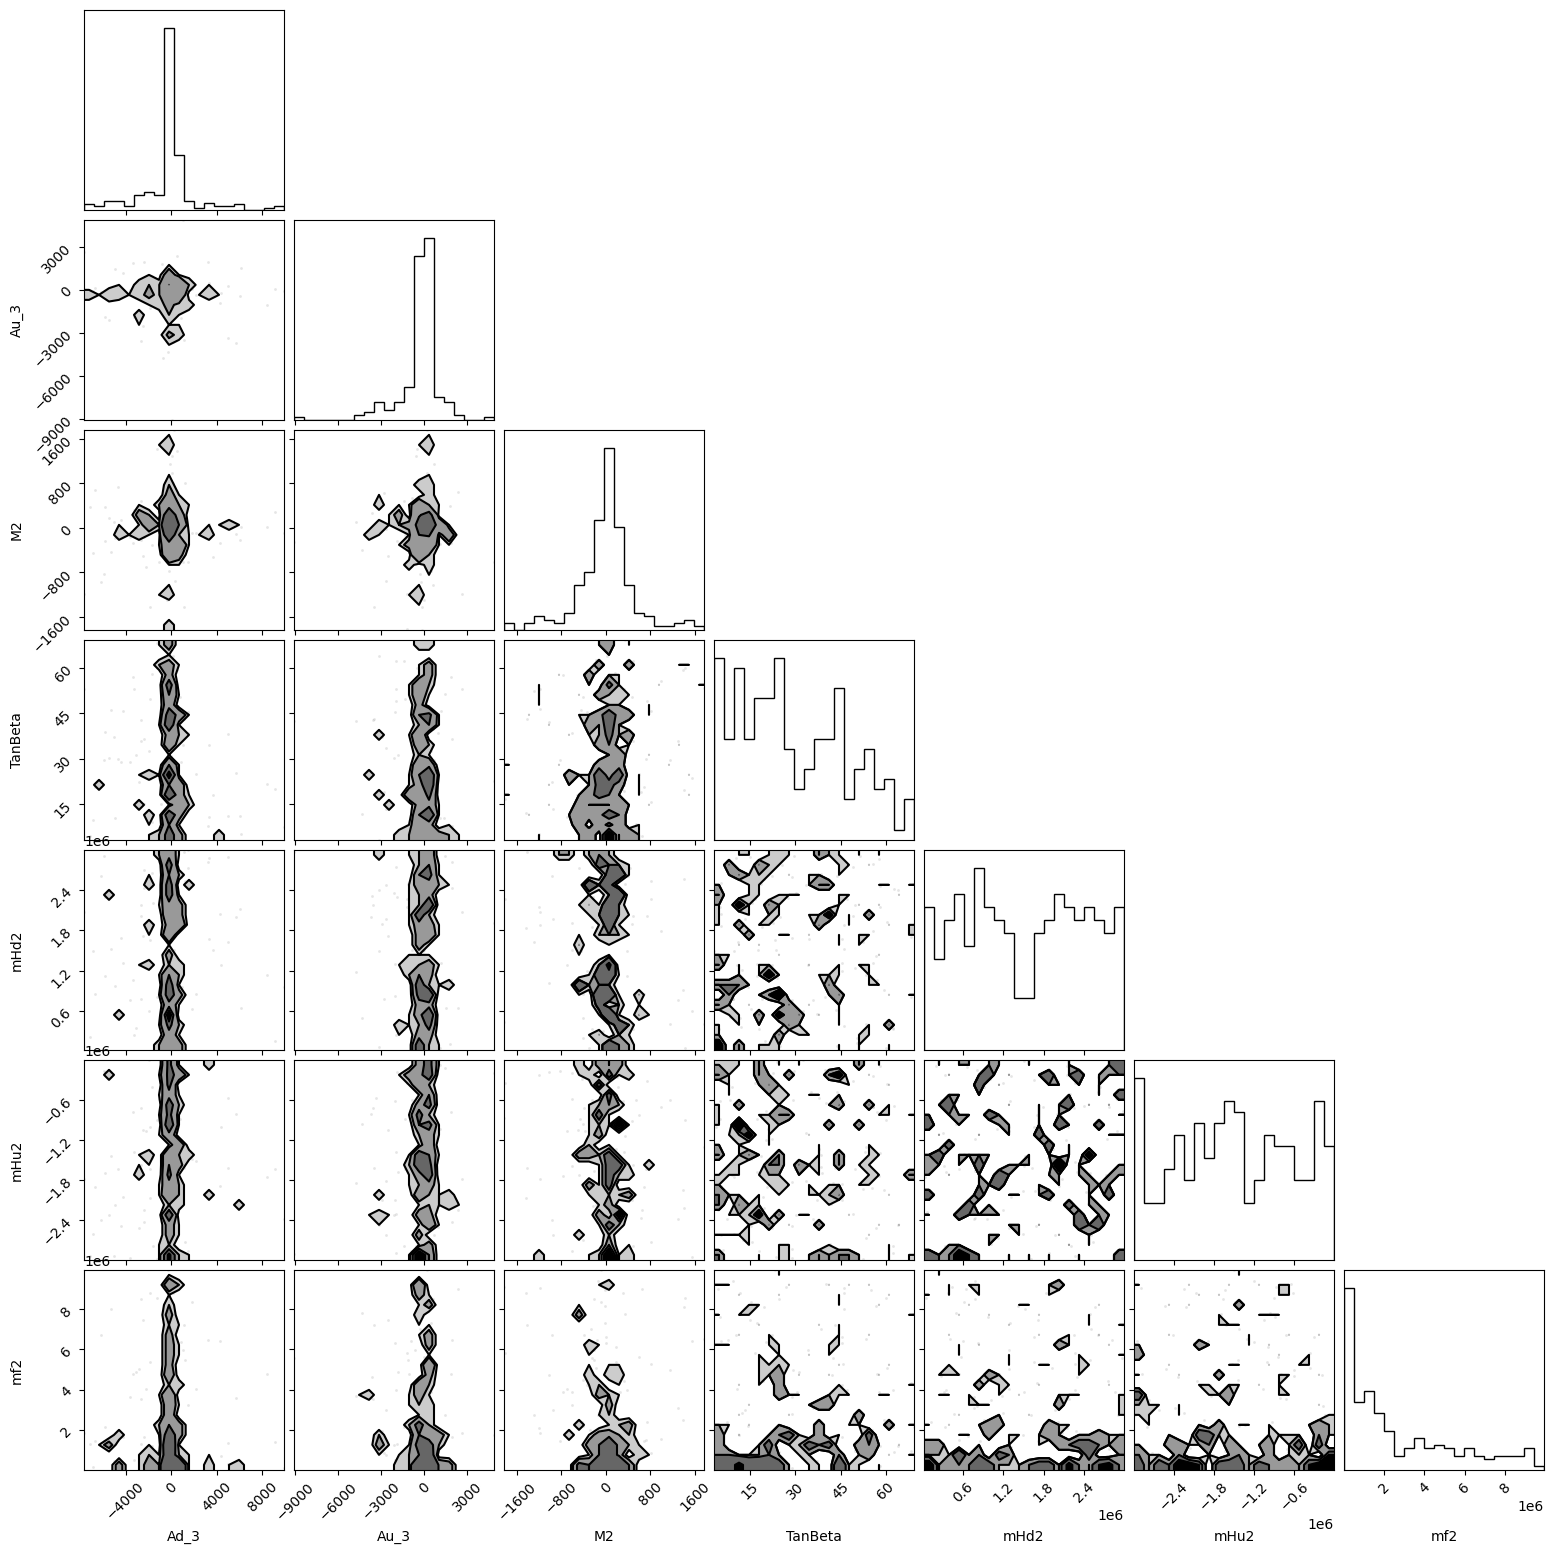

In [5]:
corner_fig = corner.corner(valid_models, labels=parameter_df.columns, fill_contours=True, plot_density=True)
corner_fig.savefig(f"plots/gambit-{input_file.split('/')[-3]}-spectrum-corner.png")

In [6]:
atlas_run2_ranges = {
    "Qin": 2000,
    "SignMu": 1,
    "TanBeta": [1,60],
    "mHu2": [-5000, 5000],
    "mHd2": [-5000, 5000],
    "M1": [-2000, 2000],
    "M2": [-2000, 2000],
    "M3": [1000, 5000],
    "mq2_12": 10000,
    "mq2_3": [2000, 5000],
    "ml2_12": 10000,
    "ml2_3": 10000,
    "md2_12": 10000,
    "md2_3": [2000, 5000],
    "mu2_12": 10000,
    "mu2_3": [2000, 5000],
    "Ae_3": [-2000, 2000],
    "Ad_3": [-2000, 2000],
    "Au_3": [-8000, 8000]
    }

In [7]:
minima = valid_models.min()
maxima = valid_models.max()
atlas_compatible_models = pd.DataFrame()
for parameter, range in atlas_run2_ranges.items():
    if parameter in valid_models.columns:
        atlas_compatible_models[parameter]  = valid_models[parameter].between(range[0], range[1])
boundary_table = pd.DataFrame({
    "Min": minima,
    "Max": maxima,
    #"inside ALTAS bounds": ,
})
boundary_table["inside ALTAS bounds"] = [atlas_compatible_models[parameter].sum() if parameter in atlas_compatible_models.columns else "NaN" for parameter in boundary_table.index]
boundary_table

,Min,Max,inside ALTAS bounds
Ad_3,-7.659663e+03,9.909969e+03,151
Au_3,-9.069487e+03,4.875775e+03,192
M2,-1.832129e+03,1.763527e+03,193
TanBeta,3.005443e+00,6.936581e+01,183
mHd2,2.225911e+04,2.992310e+06,0
mHu2,-2.994858e+06,-3.237378e+03,1
mf2,1.521580e+04,9.944407e+06,NaN


In [8]:
create_yaml(base_yaml="../Util/raw/FS_MSSM7atQ.yaml", section="Parameters", keys="MSSM7atQ", values=valid_models.to_dict(orient="list"), clear=True)

[Debug]                 Using base yaml file: ../Util/raw/FS_MSSM7atQ.yaml
[Debug]                 Modifying section 'Parameters' in base yaml file
[Debug]                 Clearing section 'Parameters'
[Debug]                 Appending key/value pair 'MSSM7atQ: {'Ad_3':
                        [882.0227115972604, -7127.352024959405, -146.0713559228171, 134.29715801059137, 60.76002827221376, -2372.2853813866195, -167.46088976415615, 109.34537401368098, 185.8845874019523, 192.91451228340662, -4386.874846760383, 4.2272721633624855, 35.02707590068263, -82.45436189532438, 751.8880969810008, -1.9246335055928085, -247.01695042517426, 1193.6191722445963, -1628.8722320916524, -147.31849422715433, -288.8547834590347, -29.418893075149086, -1231.239808988268, -3333.7305372239653, -106.59394076664493, 358.481245172338, -2813.591534693267, 168.53242364295903, -1222.4131289488853, 116.74068754313905, 15.829685887733447, 179.6070739978153, 735.1990760597121, 48.255980958737325, 79.3351098223454, 741.6